In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
import seaborn as sb

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# Set up DEG lists

In [3]:
LPC_demyel_2 = pd.read_csv('./files/LPC_demyel_Mg_A_v_BAMs_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_2.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_2.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_2.shape

(9436, 7)

In [4]:
LPC_demyel = pd.read_csv('./files/LPC_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
LPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel.shape

(10659, 7)

In [5]:
LPC_remyel = pd.read_csv('./files/LPC_remyel_MG_DAMs_voom_wqw.csv', index_col=None)
LPC_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel.shape

(10358, 7)

In [6]:
Cupr_demyel = pd.read_csv('./files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel.shape

(10148, 7)

In [7]:
Cupr_remyel = pd.read_csv('./files/Cupr_remyel_MG_DAM_voom_wqw.csv', index_col=None)
Cupr_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel.shape

(9300, 7)

In [8]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 1)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -1)]
print(LPC_demyel_2_down.shape)

(1222, 7)
(2877, 7)


In [9]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 1)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -1)]
print(LPC_de_down.shape)

(914, 7)
(2241, 7)


In [10]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 1)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -1)]
print(LPC_re_down.shape)

(531, 7)
(1908, 7)


In [11]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 1)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -1)]
print(Cupr_de_down.shape)

(738, 7)
(2463, 7)


In [12]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 1)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -1)]
print(Cupr_re_down.shape)

(425, 7)
(1076, 7)


## 1.5X fold change

In [13]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

(1446, 7)
(3677, 7)


In [14]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_de_down.shape)

(1083, 7)
(2903, 7)


In [15]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_re_down.shape)

(728, 7)
(2564, 7)


In [16]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(1107, 7)
(4365, 7)


In [17]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_re_down.shape)

(430, 7)
(1085, 7)


In [18]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_DAMs_up = LPC_de_up['gene'].tolist()
genes_LPC_re_DAMs_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_DAMs_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_DAMs_up = Cupr_re_up['gene'].tolist()

In [19]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_DAMs_down = LPC_de_down['gene'].tolist()
genes_LPC_re_DAMs_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_DAMs_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_DAMs_down = Cupr_re_down['gene'].tolist()

# SUBSET TO ONLY SHARED GENES TESTED IN ALL CONDITIONS

In [20]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(LPC_demyel_2['gene']) & \
                       set(LPC_demyel['gene']) & \
                       set(LPC_remyel['gene']) & \
                       set(Cupr_demyel['gene']) & \
                       set(Cupr_remyel['gene'])

In [21]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
LPC_demyel_2_up = filter_genes(LPC_demyel_2_up)
LPC_de_up = filter_genes(LPC_de_up)
LPC_re_up = filter_genes(LPC_re_up)
Cupr_de_up = filter_genes(Cupr_de_up)
Cupr_re_up = filter_genes(Cupr_re_up)

print(LPC_demyel_2_up.shape)
print(LPC_de_up.shape)
print(LPC_re_up.shape)
print(Cupr_de_up.shape)
print(Cupr_re_up.shape)

(1222, 7)
(960, 7)
(682, 7)
(852, 7)
(360, 7)


In [22]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
LPC_demyel_2_down = filter_genes(LPC_demyel_2_down)
LPC_de_down = filter_genes(LPC_de_down)
LPC_re_down = filter_genes(LPC_re_down)
Cupr_de_down = filter_genes(Cupr_de_down)
Cupr_re_down = filter_genes(Cupr_re_down)

print(LPC_demyel_2_down.shape)
print(LPC_de_down.shape)
print(LPC_re_down.shape)
print(Cupr_de_down.shape)
print(Cupr_re_down.shape)

(3386, 7)
(2329, 7)
(2130, 7)
(3488, 7)
(930, 7)


# Set up gene lists- overlapping only

In [23]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_DAMs_up = LPC_de_up['gene'].tolist()
genes_LPC_re_DAMs_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_DAMs_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_DAMs_up = Cupr_re_up['gene'].tolist()

In [24]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_DAMs_down = LPC_de_down['gene'].tolist()
genes_LPC_re_DAMs_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_DAMs_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_DAMs_down = Cupr_re_down['gene'].tolist()

In [25]:
set_LPC_de_BAMs_up = set(genes_LPC_de_BAMs_up)
set_LPC_de_DAMs_up = set(genes_LPC_de_DAMs_up)
set_LPC_re_DAMs_up = set(genes_LPC_re_DAMs_up)
set_Cupr_de_DAMs_up = set(genes_Cupr_de_DAMs_up)
set_Cupr_re_DAMs_up = set(genes_Cupr_re_DAMs_up)
set_LPC_de_BAMs_down = set(genes_LPC_de_BAMs_down)
set_LPC_de_DAMs_down = set(genes_LPC_de_DAMs_down)
set_LPC_re_DAMs_down = set(genes_LPC_re_DAMs_down)
set_Cupr_de_DAMs_down = set(genes_Cupr_de_DAMs_down)
set_Cupr_re_DAMs_down = set(genes_Cupr_re_DAMs_down)

print(len(set_Cupr_re_DAMs_down))

930


In [26]:
# Overlap of upregulated genes
overlap_up_all = set_LPC_de_BAMs_up & set_LPC_de_DAMs_up & set_LPC_re_DAMs_up & set_Cupr_de_DAMs_up & set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_all))
print("Overlapping upregulated genes:", overlap_up_all)

Number of overlapping upregulated genes: 149
Overlapping upregulated genes: {'Apoc2', 'Cd200r4', 'Cpd', 'Fam20c', 'Lmnb1', 'Cd300lf', 'Creg1', 'Dram1', 'Crip1', 'Ms4a7', 'Hspe1', 'Plin2', 'Axl', 'Gm38335', 'Ezr', 'Hcst', 'Rpl10a', 'Anxa5', 'Tpm4', 'Slc2a6', 'Atp1a3', 'Timp2', 'Fabp5', 'Tpd52', 'Txn1', 'Lgals3', 'Gas2l3', 'Lilrb4a', 'Cd68', 'Lipa', 'Gpnmb', 'Fxyd5', 'Arhgap24', 'Cd52', 'Rell1', 'Mamdc2', 'Ctsb', 'Xylt1', 'Gpi1', 'Rai14', 'Sh3pxd2b', 'Fcgr4', 'Cybb', 'Man2a1', 'Sash1', 'Rab7b', 'Fcer1g', 'Lgals3bp', 'Nme2', 'Csf2ra', 'Iqgap1', 'Vat1', 'Ctse', 'Apoe', 'Mfsd12', 'Dab2', 'Lpl', 'Il3ra', 'Apoc4', 'Lyz2', 'Gpr65', 'Ptger4', 'Fmn1', 'Atox1', 'Adam8', 'Apoc1', 'Malt1', 'Rftn1', 'Fn1', 'Amdhd2', 'Tmem106a', 'Bcar3', 'Vim', 'Pim1', 'Tyrobp', 'Trps1', 'Plxnc1', 'Anxa4', 'Pgk1', 'Igf1', 'Ctsd', 'Rtcb', 'Capg', 'Psen2', 'Akr1a1', 'Cyp4f18', 'Aprt', 'Aldoa', 'B2m', 'Wfdc17', 'Tmem205', 'Mif', 'Milr1', 'Sh3bgrl3', 'Gpr137b', 'Bst2', 'Dnase1l1', 'Bhlhe40', 'Gcnt2', 'Cd22', 'Apobec1', '

In [27]:
# Overlap of upregulated genes
overlap_down_all = set_LPC_de_BAMs_down & set_LPC_de_DAMs_down & set_LPC_re_DAMs_down & set_Cupr_de_DAMs_down & set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_all))
print("Overlapping upregulated genes:", overlap_down_all)

Number of overlapping upregulated genes: 638
Overlapping upregulated genes: {'Vps18', 'Zfp69', 'P2ry10b', 'Rtn4rl1', 'P2ry12', 'Gabpb2', 'Rbm39', 'Chil1', 'Bcl9l', 'Mef2c', 'Cep63', 'Gm47167', 'Gna15', 'Exog', 'Ino80dos', 'Cbfa2t3', 'Mlxip', 'Top1', 'Txnip', 'Letm2', 'Stard8', 'Ecscr', 'Nlk', 'Ppp1r10', 'Traf3ip3', 'Gm16576', 'Rsrc2', 'Eng', 'Arhgap4', 'P2ry13', 'Gm15614', 'Gm27017', 'Eef2k', 'Ranbp10', 'Pnrc1', 'Ccdc192', 'Prdm11', 'Crybb1', 'Eml6', '3222401L13Rik', 'Csmd3', 'Tanc2', 'Arhgap12', 'Nol4l', 'R74862', '2610020C07Rik', 'Prox2', 'Pdlim4', 'Siglech', 'Fam13b', 'Cdkn2aip', 'Golm1', 'Ube2g1', 'AW146154', 'Nav2', 'Rccd1', 'Ksr1', 'Upk1b', 'Nlrp1b', 'Orai1', 'Fgd2', 'Rab39', 'AU041133', 'Phf7', 'Map4', 'Calm2', 'Zfp335os', 'Terf2', 'Spire1', 'Tspan18', 'Rasgrp3', 'Ccdc93', 'Phf20l1', '1810026B05Rik', 'Prpsap2', 'Osbpl11', 'Hpgds', 'Arhgap27', 'Abhd6', 'Trim8', 'Smg6', 'Gmeb2', 'Etv5', 'Tbxas1', 'Agmo', 'Prpf4b', 'Prkn', 'Phf20', 'Ccr5', 'Hhex', 'Wwc2', 'Cttnbp2nl', 'Abcb4', 'Hel

In [28]:
# Overlap of upregulated genes
overlap_up_lpc = set_LPC_de_BAMs_up & set_LPC_de_DAMs_up & set_LPC_re_DAMs_up - set_Cupr_de_DAMs_up - set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_lpc))
print("Overlapping upregulated genes:", overlap_up_lpc)

Number of overlapping upregulated genes: 136
Overlapping upregulated genes: {'Ndufa3', 'Psmd9', 'Chchd1', 'Eef1a1', 'Acp1', 'Stx12', 'Slc27a1', 'Golga7', 'Mrpl40', 'Idh1', 'Hspb11', 'Erp44', 'Vamp8', 'P3h3', 'Auh', 'Polr2j', 'D8Ertd738e', 'Cdc42se2', 'Erg28', 'Trem2', 'Dpy30', 'Smim20', 'Cnih1', 'Rnf7', 'Rpl21', 'Ei24', 'Med28', 'Sypl', 'Tmem208', 'Clpp', 'Selenoh', 'Mrpl14', 'Pnkd', 'Gltp', 'Rps16', 'Mrpl53', 'Nudc', 'Ctsa', 'Mrpl18', 'Hexa', 'Naca', 'Tmem123', 'Dhrs3', 'Cript', 'Naxe', 'Ppil3', 'Pno1', 'Cacybp', 'H2afv', 'Mrps12', 'Arpc1a', 'Pmvk', 'Grina', 'Anapc11', 'Rps5', 'Fam174a', 'Nudt4', 'BC031181', 'Gcsh', 'Rpl36', 'Tmem14c', 'Bet1', 'Dctn3', 'Cox17', 'Etfrf1', '2210016L21Rik', 'Mpc2', 'Idh3b', 'Dynlrb1', 'Rpl14', 'Chmp2a', 'Cox7c', 'Tomm22', 'Ubxn1', 'Nabp2', 'Sdhd', 'Tmem258', 'Nudt2', 'Tnfsf12', 'Sdcbp', 'Gpx4', 'Arf5', 'Ost4', 'Zfp704', 'Ndufv2', 'Rps7', 'Riok3', 'Trim35', 'Rtraf', 'Cfap36', 'Ftl1', 'C1d', 'Tnfsf13', 'Mapk3', 'Sdhb', 'Adi1', 'Lamp1', 'Chpt1', 'Mrpl36', '

In [29]:
# Overlap of upregulated genes
overlap_up_cupr = set_Cupr_de_DAMs_up & set_Cupr_re_DAMs_up - set_LPC_de_BAMs_up - set_LPC_de_DAMs_up - set_LPC_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_cupr))
print("Overlapping upregulated genes:", overlap_up_cupr)

Number of overlapping upregulated genes: 49
Overlapping upregulated genes: {'Sulf2', 'Rpl10-ps3', 'Gm41609', 'Bcl2a1b', 'Sdc4', 'Fam49a', 'Ms4a4c', 'Ankrd33b', 'Tnfaip8', 'Gbp5', 'A430093F15Rik', 'Nlrc5', 'Il11ra1', 'Ctnnb1', 'Tnfsf9', 'Gch1', 'Chst11', 'Lcp1', 'Srxn1', 'Gm15832', 'Itga5', 'Tank', 'Gadd45b', 'Fam129a', 'Prkg1', 'Tnfaip2', 'Gsap', 'Wdr89', 'Ifih1', 'Sept11', 'Sowahc', 'Rps27rt', 'Pvr', 'Gm31718', 'Isg15', 'Ptprj', 'Fgf13', 'Foxp4', 'AU020206', 'Ccrl2', 'Jak2', 'March3', 'Mocs1', 'Clic4', 'Hacd2', 'Samd9l', 'Kynu', 'Traf3', 'Stx11'}


In [30]:
# Overlap of upregulated genes
overlap_down_lpc = set_LPC_de_BAMs_down & set_LPC_de_DAMs_down & set_LPC_re_DAMs_down - set_Cupr_de_DAMs_down - set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_lpc))
print("Overlapping upregulated genes:", overlap_down_lpc)

Number of overlapping upregulated genes: 213
Overlapping upregulated genes: {'Sec16a', 'Tbc1d31', 'Mbd1', 'Nupr1', 'Ywhag', 'Lats1', 'Nol8', 'Gnb1', 'Baz2b', 'Baz1a', 'Tardbp', 'Cnot1', 'Cstf3', 'Spag9', 'Dhx15', 'Suz12', '1810013L24Rik', 'Mplkip', 'Mapk1ip1l', 'Jup', 'Pdss1', 'Snhg1', 'Trim56', 'Gm11613', 'Mindy3', 'Cpeb4', 'Stk40', 'Mdc1', 'Ddx18', 'Kif3b', 'Ap2b1', 'Sbno1', 'Smc1a', 'Ddx21', 'Kdm5a', 'Smcr8', 'Ubap2l', 'Tnpo2', 'Cpeb2', 'Exoc3', 'Kmt2a', 'Nup153', 'Dock2', 'Wipf1', 'Slc35d2', 'Mib1', 'Sh3kbp1', 'Acsl4', 'Rbm5', 'Skap2', 'Rcc2', 'Vps4b', 'Nuak2', 'Nadk', 'Retreg1', 'Mapk6', 'Brwd3', 'Rasa1', 'Arl5b', 'Ccnh', 'Ier2', 'Fbxo34', 'Map3k8', 'Eml4', 'Ppp1r11', 'Rnf44', 'Ggnbp2', 'Fbxl17', 'Gt(ROSA)26Sor', 'Pcsk7', 'Cul3', 'Kansl1l', 'Arfgef1', 'Morf4l2', 'Ash1l', 'Xrn2', 'Nsrp1', 'Tnrc6a', 'Fubp1', 'Nktr', 'Memo1', 'Zfp622', 'Rap1gds1', 'Msl2', 'Rnf19a', 'Sertad2', 'Ehmt1', 'Mrps6', 'Pgap2', 'Rbbp8', 'Ccdc9', 'Creb1', 'Fam133b', 'Trip12', 'Med12', 'Gm47283', 'Usp16', 'Rbm1

In [31]:
# Overlap of upregulated genes
overlap_down_cupr = set_Cupr_de_DAMs_down & set_Cupr_re_DAMs_down - set_LPC_de_BAMs_down - set_LPC_de_DAMs_down - set_LPC_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_cupr))
print("Overlapping upregulated genes:", overlap_down_cupr)

Number of overlapping upregulated genes: 54
Overlapping upregulated genes: {'N4bp2l1', 'Rmdn1', 'Mtmr10', 'Micu3', 'Zfp282', 'Ube2a', 'St6galnac4', 'Vps33b', 'Slx4ip', 'Zfp668', '2010315B03Rik', '9930021J03Rik', 'Slc37a3', 'Zfp398', 'E130309D02Rik', 'Deaf1', 'Kansl2', 'Dnmbp', 'Zfp746', 'Dusp1', 'Slc44a2', 'Strbp', 'Zfp512b', 'Trmt1l', 'Mtif3', '4930414N06Rik', 'Mbip', 'Tbp', 'Arrdc3', 'Emsy', 'Edem3', 'Zfp606', 'Ppp2cb', 'Cnpy3', 'Cdk5rap1', 'Cln8', 'Sla', 'Tnfaip8l2', '9130230L23Rik', 'Saraf', 'Zfp157', 'Cep192', 'Necap1', 'Usf1', 'Rbfa', 'Mrgbp', 'Adamts6', 'Lgmn', 'Jmy', 'Nelfa', 'Patz1', 'Rgs1', 'Tent4b', 'Amd1'}


In [32]:
# Overlap of upregulated genes
overlap_up_demyel = set_Cupr_de_DAMs_up &  set_LPC_de_BAMs_up & set_LPC_de_DAMs_up - set_LPC_re_DAMs_up - set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_demyel))
print("Overlapping upregulated genes:", overlap_up_demyel)

Number of overlapping upregulated genes: 101
Overlapping upregulated genes: {'Rab32', 'Mcm6', 'Mrpl54', 'Mrpl27', 'Vps29', 'Acaa2', 'Mcee', 'Gng5', 'Ube2l3', 'Tnni2', 'Llph', 'Cops9', 'Adap1', '0610012G03Rik', 'Bri3bp', 'Mrpl51', 'Mrps28', 'Dnajb14', 'Galc', 'Eif3h', 'Hscb', 'Asna1', 'Sntb2', 'Psat1', 'Bak1', 'Esd', 'Tma7', '2310039H08Rik', 'Atp6v1b2', 'Ddx41', 'Cox5a', 'Arl11', 'Pdap1', 'Ola1', 'Fuca1', 'Mrps21', 'Tmem160', 'Slirp', 'Trappc2l', 'Plin3', 'Rps12', 'Fxn', 'Sap30', 'Arhgap19', 'Anp32b', 'Cenpx', 'Trappc6a', 'Mrps14', 'Mrpl21', 'Mrpl33', 'Mpp1', 'Timm8b', 'Hacd4', 'Atpif1', 'Iqsec1', 'Bag1', 'Prdx4', 'Rida', 'Gba', 'Ap2s1', 'Glmp', 'Slc36a4', 'Myl6', 'Abr', 'Xaf1', 'Lyst', 'Lamtor2', 'Htatip2', 'Abcg1', 'Rpl12', 'Ap1s1', 'Gnptab', 'Tecpr1', 'Sp100', 'Lsm4', 'Mvb12a', 'Gusb', 'Nbdy', 'Tmem80', 'Grn', 'Gm17018', 'Micos10', 'Psmg4', 'Fkbp2', 'Osbpl3', 'Slc38a6', 'Ap3s1', 'Sdhc', 'Smn1', 'Rpl36al', 'Pfdn1', 'Ethe1', 'Pgls', 'Gramd1b', 'Mrpl42', 'Ttyh2', 'Ift57', 'Mpc1', 'Serpi

In [33]:
# Overlap of upregulated genes
overlap_down_demyel = set_Cupr_de_DAMs_down &  set_LPC_de_BAMs_down & set_LPC_de_DAMs_down - set_LPC_re_DAMs_down - set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_demyel))
print("Overlapping upregulated genes:", overlap_down_demyel)

Number of overlapping upregulated genes: 360
Overlapping upregulated genes: {'Als2', 'Supt6', 'Mis12', 'Gm26826', 'Ubr1', 'Trappc12', 'Tut1', 'Map2k1', 'Bag3', 'Champ1', 'Ccdc130', 'Ppp1r37', 'Ncoa5', 'Phf12', 'Kcnrg', 'Gtf3c2', 'Rai1', 'Tbc1d14', 'Ppp5c', 'Nckipsd', 'Hnrnpl', 'Arsk', 'Zfp597', 'Ap3m2', 'Adap2os', 'Usp35', 'Batf3', 'Pex5', 'Rnf19b', 'Ankrd54', 'Pros1', 'Nfatc2ip', 'Gm28198', 'Ppp6c', 'Xrcc4', 'Phf23', 'Cbfb', 'Mfap1a', 'Tlr6', 'Chuk', 'Traf6', 'Upf1', 'Zeb2os', 'Sugp2', 'Rassf2', 'Dguok', 'Cpsf6', '1600020E01Rik', 'Eefsec', 'Trmo', 'Mtmr1', '1110051M20Rik', 'Zfand3', 'Gm20234', 'Spata1', 'Traf2', 'Ccnl2', 'H2-Q4', 'Map4k2', 'Rnf6', 'Exosc10', 'Atf1', 'Il4ra', 'Per1', 'Ebi3', 'Phf1', 'Wdr37', 'Zxdc', 'Gpr146', 'Plcb3', 'Gtf2i', 'Zyg11b', 'Arrdc1', 'Gm27241', 'Qtrt1', 'Mapk1ip1', 'Cic', 'Adck5', 'Elf4', 'Rnf103', 'Cyp4f13', 'Ppm1d', 'Donson', 'Plk3', 'Tiprl', 'Dnajc18', 'Ythdf2', 'Irgm2', 'Clp1', 'Was', 'Prkch', 'Man1a', 'Grk2', 'Klhl18', 'Gm42659', 'Bcl6', 'Dhx8', 'Cpsf

In [34]:
print("Number of overlapping upregulated genes:", len(overlap_up_all))
print("Number of overlapping upregulated genes:", len(overlap_up_demyel))
print("Number of overlapping upregulated genes:", len(overlap_up_lpc))
print("Number of overlapping upregulated genes:", len(overlap_up_cupr))
print("Number of overlapping upregulated genes:", len(overlap_down_cupr))
print("Number of overlapping upregulated genes:", len(overlap_down_lpc))
print("Number of overlapping upregulated genes:", len(overlap_down_demyel))
print("Number of overlapping upregulated genes:", len(overlap_down_all))

Number of overlapping upregulated genes: 149
Number of overlapping upregulated genes: 101
Number of overlapping upregulated genes: 136
Number of overlapping upregulated genes: 49
Number of overlapping upregulated genes: 54
Number of overlapping upregulated genes: 213
Number of overlapping upregulated genes: 360
Number of overlapping upregulated genes: 638


In [35]:
# Assuming the gene lists are already defined in Python
gene_lists = [
    overlap_up_all, overlap_up_demyel, overlap_up_lpc, overlap_up_cupr,
    overlap_down_cupr, overlap_down_lpc, overlap_down_demyel, overlap_down_all
]

# Flatten the lists and remove duplicates
all_genes = list(set().union(*gene_lists))

# Save to CSV for import into R
pd.DataFrame(all_genes, columns=["genes"]).to_csv("genes_for_heatmap.csv", index=False)

In [36]:
gene_lists = [
    ('Up_all', overlap_up_all),
    ('Up_demyel', overlap_up_demyel),
    ('Up_LPC', overlap_up_lpc),
    ('Up_Cupr', overlap_up_cupr),
    ('Down_Cupr', overlap_down_cupr),
    ('Down_LPC', overlap_down_lpc),
    ('Down_demyel', overlap_down_demyel),
    ('Down_all', overlap_down_all)
]

# Flatten the lists and create a new DataFrame
all_genes = []
for label, gene_list in gene_lists:
    all_genes.extend([(gene, label) for gene in gene_list])

# Convert to DataFrame
df_genes = pd.DataFrame(all_genes, columns=["gene", "category"])

# Save to CSV
df_genes.to_csv("genes_for_heatmap_with_labels.csv", index=False)

# Confirming the CSV output
print(df_genes.head())

      gene category
0    Apoc2   Up_all
1  Cd200r4   Up_all
2      Cpd   Up_all
3   Fam20c   Up_all
4    Lmnb1   Up_all


# Complex heatmap

In [37]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

pd.set_option('display.max_columns', None)

%load_ext rpy2.ipython

In [38]:
from matplotlib import rcParams
from matplotlib import cm, colors

#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [84]:
%%R
library(edgeR)
library(ComplexHeatmap)
library(data.table)
library(ComplexHeatmap)
library(circlize)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [40]:
adata_lpc = sc.read('./pb_adata_LPC_Mg.h5ad')
adata_lpc

AnnData object with n_obs × n_vars = 49 × 17747
    obs: 'publication', 'label', 'cell_type', 'replicate_cat', 'sample', 'sample_rep', 'batch', 'lib_size', 'log_lib_size', 'replicate'
    uns: 'cell_type_colors', 'label_colors', 'log1p', 'pca', 'publication_colors', 'replicate_cat_colors', 'sample_colors', 'sample_rep_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [41]:
adata_cupr = sc.read('./pb_adata_Cupr_Mg.h5ad')
adata_cupr

AnnData object with n_obs × n_vars = 44 × 16393
    obs: 'publication', 'label', 'cell_type', 'replicate_cat', 'sample', 'sample_rep', 'batch', 'lib_size', 'log_lib_size', 'replicate'
    uns: 'cell_type_colors', 'label_colors', 'log1p', 'pca', 'publication_colors', 'replicate_cat_colors', 'sample_colors', 'sample_rep_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [42]:
import anndata as ad

# Concatenate along observations (rows)
adata_pb = ad.concat([adata_cupr, adata_lpc], axis=0)

# Check the result
print(adata_pb)

AnnData object with n_obs × n_vars = 93 × 16000
    obs: 'publication', 'label', 'cell_type', 'replicate_cat', 'sample', 'sample_rep', 'batch', 'lib_size', 'log_lib_size', 'replicate'
    obsm: 'X_pca'
    layers: 'counts'


In [43]:
adata_pb.obs[:5]

,publication,label,cell_type,replicate_cat,sample,sample_rep,batch,lib_size,log_lib_size,replicate
donor_ctrl_3_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,3,ctrl_3,Cupr_ctrl_Shen_2,0,240640,12.391057,3
donor_ctrl_4_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,4,ctrl_4,Cupr_ctrl_Shen_1,0,3305175,15.011000,4
donor_ctrl_5_0-0-0-0-0,Shen et al. 2021,ctrl,Mg_A,5,ctrl_5,Cupr_ctrl_Shen_3,0,2702141,14.809555,5
donor_stim_2_0-0-0-0-0,(this study),stim,Mg_A,2,stim_2,Cupr_5w_2,0,33969,10.433204,2
donor_stim_3_0-0-0-0-0,Shen et al. 2021,stim,Mg_A,3,stim_3,Cupr_4+3w_1,0,125431,11.739511,3


In [44]:
# Extract the data as a pandas DataFrame
df = adata_pb.obs[['cell_type', 'label']]

# Create a summary table
summary_table = df.groupby(['cell_type', 'label']).size().unstack(fill_value=0)
summary_table

label,ctrl,stim
cell_type,,
BAMs,1,13
Mg_A,7,15
Mg_B,7,17
Mg_trt,5,18
cycl,0,10


In [45]:
adata_sub= adata_pb[np.in1d(adata_pb.obs['cell_type'], 
                           ['Mg_A', 'Mg_trt', 'BAMs'])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (59, 16000)


In [46]:
# Concatenate 'individual_lesion_condition' and 'replicate' to create 'sample'
adata_sub.obs['cell_type_sample'] = adata_sub.obs['cell_type'].astype(str) + '_' + adata_sub.obs['sample_rep'].astype(str)

In [47]:
# Unique values in the 'condition' column
unique_conditions = adata_sub.obs['cell_type_sample'].unique()
for condition in unique_conditions:
    print(condition)

Mg_A_Cupr_ctrl_Shen_2
Mg_A_Cupr_ctrl_Shen_1
Mg_A_Cupr_ctrl_Shen_3
Mg_A_Cupr_5w_2
Mg_A_Cupr_4+3w_1
Mg_A_Cupr_4w_3
Mg_A_Cupr_4w_2
Mg_A_Cupr_4+3w_3
Mg_A_Cupr_4w_4
Mg_A_Cupr_4+3w_2
Mg_A_Cupr_4w_1
Mg_trt_Cupr_ctrl_Shen_1
Mg_trt_Cupr_ctrl_Shen_3
Mg_trt_Cupr_5w_1
Mg_trt_Cupr_5w_2
Mg_trt_Cupr_4+3w_1
Mg_trt_Cupr_4w_3
Mg_trt_Cupr_4w_2
Mg_trt_Cupr_4+3w_3
Mg_trt_Cupr_4w_4
Mg_trt_Cupr_4+3w_2
Mg_trt_Cupr_4w_1
BAMs_Cupr_ctrl_Shen_1
BAMs_Cupr_4w_2
BAMs_Cupr_4w_4
BAMs_Cupr_4+3w_2
BAMs_Cupr_4w_1
Mg_A_LPC_Saline_2
Mg_A_LPC_Saline_1
Mg_A_LPC_ctrl_2
Mg_A_LPC_ctrl_1
Mg_A_LPC_7d_2
Mg_A_LPC_5d_4
Mg_A_LPC_7d_1
Mg_A_LPC_5d_1
Mg_A_LPC_28d_3
Mg_A_LPC_28d_1
Mg_A_LPC_28d_2
Mg_trt_LPC_Saline_2
Mg_trt_LPC_Saline_1
Mg_trt_LPC_ctrl_1
Mg_trt_LPC_7d_2
Mg_trt_LPC_5d_4
Mg_trt_LPC_7d_1
Mg_trt_LPC_5d_1
Mg_trt_LPC_5d_3
Mg_trt_LPC_28d_3
Mg_trt_LPC_28d_1
Mg_trt_LPC_5d_2
Mg_trt_LPC_28d_2
BAMs_LPC_7d_2
BAMs_LPC_5d_4
BAMs_LPC_7d_1
BAMs_LPC_5d_1
BAMs_LPC_5d_3
BAMs_LPC_28d_3
BAMs_LPC_28d_1
BAMs_LPC_5d_2
BAMs_LPC_28d_2


In [48]:
adata_sub= adata_sub[np.in1d(adata_sub.obs['cell_type_sample'], 
                           [
                            'Mg_A_Cupr_ctrl_Shen_2',
                            'Mg_A_Cupr_ctrl_Shen_1',
                            'Mg_A_Cupr_ctrl_Shen_3',
                            'Mg_trt_Cupr_5w_1',
                            'Mg_trt_Cupr_5w_2',
                            'Mg_trt_Cupr_4+3w_1',
                            'Mg_trt_Cupr_4w_3',
                            'Mg_trt_Cupr_4w_2',
                            'Mg_trt_Cupr_4+3w_3',
                            'Mg_trt_Cupr_4w_4',
                            'Mg_trt_Cupr_4+3w_2',
                            'Mg_trt_Cupr_4w_1',
                            'Mg_A_LPC_Saline_2',
                            'Mg_A_LPC_Saline_1',
                            'Mg_A_LPC_ctrl_2',
                            'Mg_A_LPC_ctrl_1',
                            'Mg_trt_LPC_7d_2',
                            'Mg_trt_LPC_5d_4',
                            'Mg_trt_LPC_7d_1',
                            'Mg_trt_LPC_5d_1',
                            'Mg_trt_LPC_5d_3',
                            'Mg_trt_LPC_28d_3',
                            'Mg_trt_LPC_28d_1',
                            'Mg_trt_LPC_5d_2',
                            'Mg_trt_LPC_28d_2',
                            'BAMs_LPC_7d_2',
                            'BAMs_LPC_5d_4',
                            'BAMs_LPC_7d_1',
                            'BAMs_LPC_5d_1',
                            'BAMs_LPC_5d_3',
                            'BAMs_LPC_5d_2'                
                           ])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (31, 16000)


In [49]:
# Unique values in the 'condition' column
unique_conditions = adata_sub.obs['cell_type_sample'].unique()
for condition in unique_conditions:
    print(condition)

Mg_A_Cupr_ctrl_Shen_2
Mg_A_Cupr_ctrl_Shen_1
Mg_A_Cupr_ctrl_Shen_3
Mg_trt_Cupr_5w_1
Mg_trt_Cupr_5w_2
Mg_trt_Cupr_4+3w_1
Mg_trt_Cupr_4w_3
Mg_trt_Cupr_4w_2
Mg_trt_Cupr_4+3w_3
Mg_trt_Cupr_4w_4
Mg_trt_Cupr_4+3w_2
Mg_trt_Cupr_4w_1
Mg_A_LPC_Saline_2
Mg_A_LPC_Saline_1
Mg_A_LPC_ctrl_2
Mg_A_LPC_ctrl_1
Mg_trt_LPC_7d_2
Mg_trt_LPC_5d_4
Mg_trt_LPC_7d_1
Mg_trt_LPC_5d_1
Mg_trt_LPC_5d_3
Mg_trt_LPC_28d_3
Mg_trt_LPC_28d_1
Mg_trt_LPC_5d_2
Mg_trt_LPC_28d_2
BAMs_LPC_7d_2
BAMs_LPC_5d_4
BAMs_LPC_7d_1
BAMs_LPC_5d_1
BAMs_LPC_5d_3
BAMs_LPC_5d_2


In [50]:
# Extract the data as a pandas DataFrame
df = adata_sub.obs[['cell_type_sample', 'label']]

# Create a summary table
summary_table = df.groupby(['cell_type_sample', 'label']).size().unstack(fill_value=0)
summary_table

label,ctrl,stim
cell_type_sample,,
BAMs_LPC_5d_1,0,1
BAMs_LPC_5d_2,0,1
BAMs_LPC_5d_3,0,1
BAMs_LPC_5d_4,0,1
BAMs_LPC_7d_1,0,1
BAMs_LPC_7d_2,0,1
Mg_A_Cupr_ctrl_Shen_1,1,0
Mg_A_Cupr_ctrl_Shen_2,1,0
Mg_A_Cupr_ctrl_Shen_3,1,0


In [51]:
# Check if the 'sample_rep' column exists
if 'cell_type_sample' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('cell_type_sample', inplace=True)
else:
    print("The column 'sample_rep' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

In [52]:
# Check if the 'sample_rep' column exists
if 'cell_type_sample' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('cell_type_sample', inplace=True)
else:
    print("The column 'sample_rep' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

The column 'sample_rep' does not exist in adata_sub.obs.


In [53]:
# Unique values in the 'condition' column
unique_conditions = adata_sub.obs['publication'].unique()
for condition in unique_conditions:
    print(condition)

Shen et al. 2021
(this study)
Pandey et al. 2022


In [54]:
#cell_type = {str(i): '' for i in range(18)}
pub = {
    'Shen et al. 2021': 'Shen',  
    '(this study)': 'Adams',    
    'Pandey et al. 2022': 'Pandey'
}

adata_sub.obs['batch'] = adata_sub.obs['publication'].map(pub).astype('category')

## Switch to R code

In [56]:
%%R -i adata_sub

#Create a DGElist object using the anndata counts in 'X'
x <- DGEList(assay(adata_sub, "X"), group=colData(adata_sub)$label)

samplenames <- colnames(x$counts)

print("Dimensions before subsetting:")
print(dim(x))

# Check counts per group before filtering
print(table(x$samples$group))

[1] "Dimensions before subsetting:"
[1] 16000    31

ctrl stim 
   7   24 


In [57]:
%%R -i adata_sub

# Concatenate label and cell type for group factor
group <- colData(adata_sub)$label #ctrl or stim
replicate <- colData(adata_sub)$replicate #replicate number
batch <- colData(adata_sub)$batch

treatments <- data.frame("Group"=group, "Reps"=replicate, "Batch"= batch)
print(treatments)

                      Group Reps  Batch
Mg_A_Cupr_ctrl_Shen_2  ctrl    3   Shen
Mg_A_Cupr_ctrl_Shen_1  ctrl    4   Shen
Mg_A_Cupr_ctrl_Shen_3  ctrl    5   Shen
Mg_trt_Cupr_5w_1       stim    1  Adams
Mg_trt_Cupr_5w_2       stim    2  Adams
Mg_trt_Cupr_4+3w_1     stim    3   Shen
Mg_trt_Cupr_4w_3       stim    4   Shen
Mg_trt_Cupr_4w_2       stim    5   Shen
Mg_trt_Cupr_4+3w_3     stim    6   Shen
Mg_trt_Cupr_4w_4       stim    7   Shen
Mg_trt_Cupr_4+3w_2     stim    8   Shen
Mg_trt_Cupr_4w_1       stim    9   Shen
Mg_A_LPC_Saline_2      ctrl    1  Adams
Mg_A_LPC_Saline_1      ctrl    2  Adams
Mg_A_LPC_ctrl_2        ctrl    4 Pandey
Mg_A_LPC_ctrl_1        ctrl    5 Pandey
Mg_trt_LPC_7d_2        stim    1  Adams
Mg_trt_LPC_5d_4        stim   11 Pandey
Mg_trt_LPC_7d_1        stim    2  Adams
Mg_trt_LPC_5d_1        stim    3 Pandey
Mg_trt_LPC_5d_3        stim    4 Pandey
Mg_trt_LPC_28d_3       stim    5 Pandey
Mg_trt_LPC_28d_1       stim    6 Pandey
Mg_trt_LPC_5d_2        stim    7 Pandey


In [58]:
%%R

# More strict removal of genes, tried group, pub and batch
keep.exprs <- filterByExpr(x, group=batch)
x2 <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x2)

[1] 11264    31


In [59]:
%%R

x2 <- calcNormFactors(x2, method = "TMM")
x2$samples$norm.factors

 [1] 1.0714310 1.0821795 0.9728855 1.9591839 1.6723693 0.4569876 0.7695228
 [8] 0.8033079 0.7828734 0.8071673 0.6996454 0.7465061 2.1555429 1.9065878
[15] 1.1082583 1.0035875 1.7966419 0.8744650 1.7687965 0.8894525 0.8445375
[22] 0.7548439 0.7906835 0.8048367 0.7700003 1.8953444 0.7286195 1.7438949
[29] 0.7941741 0.6075645 0.7075937


In [60]:
%%R
lcpm <- edgeR::cpm(x2, log=TRUE, prior.count=3)

In [61]:
%%R
#Batch is set to the publication of origin to remove effects between sample origins
logCPM <- removeBatchEffect(lcpm, batch=batch)

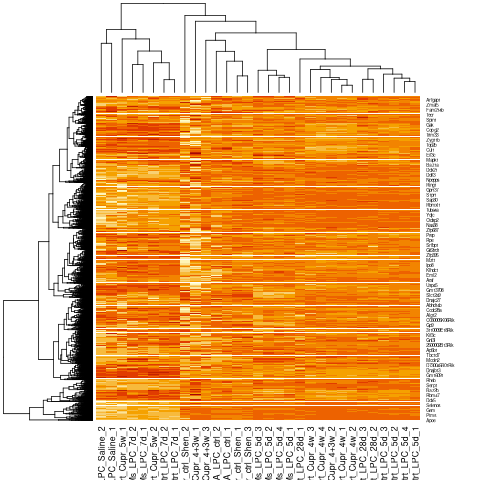

In [62]:
%%R
heatmap(lcpm)

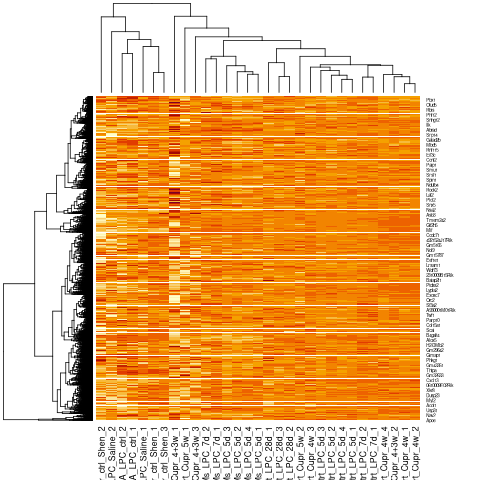

In [63]:
%%R
heatmap(logCPM)

## Generate heatmap

In [64]:
%%R
library(data.table)

# Load the CSV file generated by Python
gene_metadata <- read.csv("genes_for_heatmap_with_labels.csv")

head(gene_metadata)

     gene category
1   Apoc2   Up_all
2 Cd200r4   Up_all
3     Cpd   Up_all
4  Fam20c   Up_all
5   Lmnb1   Up_all
6 Cd300lf   Up_all


data.table 1.16.4 using 8 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following object is masked from ‘package:SummarizedExperiment’:

    shift

The following object is masked from ‘package:GenomicRanges’:

    shift

The following object is masked from ‘package:IRanges’:

    shift

The following objects are masked from ‘package:S4Vectors’:

    first, second



In [67]:
%%R
dim(gene_metadata)

[1] 1700    2


In [68]:
%%R

# Subset lcpm to only the selected genes
lcpm_subset <- logCPM[rownames(logCPM) %in% gene_metadata$gene, ]

# Check the dimensions to confirm
dim(lcpm_subset)

[1] 1700   31


In [69]:
%%R
head(lcpm_subset)

              Mg_A_Cupr_ctrl_Shen_2 Mg_A_Cupr_ctrl_Shen_1 Mg_A_Cupr_ctrl_Shen_3
0610012G03Rik              2.062673              4.641263              5.015168
0610040J01Rik              7.426454              7.678657              7.491833
1110051M20Rik              2.950239              6.052628              5.623496
1300002E11Rik              1.768928              3.357438              3.576739
1600020E01Rik              3.055975              5.186388              5.117389
1600022D10Rik              3.880526              4.029590              4.148975
              Mg_trt_Cupr_5w_1 Mg_trt_Cupr_5w_2 Mg_trt_Cupr_4+3w_1
0610012G03Rik         5.716902        0.5986823           6.716434
0610040J01Rik         6.620934        6.6538190           5.267868
1110051M20Rik         4.439476        4.2899986           1.405879
1300002E11Rik         2.894311        1.8386930          -1.804577
1600020E01Rik         5.217484        4.9172011           4.105831
1600022D10Rik         1.564895        

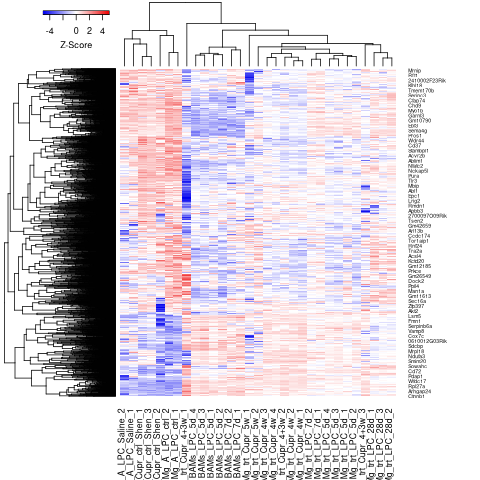

In [70]:
%%R
coolmap(lcpm_subset, margins=c(7,7), lhei=c(1,6), lwid=c(1,3))

In [71]:
%%R

# Find minimum and maximum values of lcpm_subset
min_value <- min(lcpm_subset)
max_value <- max(lcpm_subset)

# Print results
cat("Min value:", min_value, "\n")
cat("Max value:", max_value, "\n")

Min value: -3.907743 
Max value: 17.75923 


In [72]:
%%R

# Extract column names (sample names)
sample_names <- colnames(lcpm_subset)
sample_names

 [1] "Mg_A_Cupr_ctrl_Shen_2" "Mg_A_Cupr_ctrl_Shen_1" "Mg_A_Cupr_ctrl_Shen_3"
 [4] "Mg_trt_Cupr_5w_1"      "Mg_trt_Cupr_5w_2"      "Mg_trt_Cupr_4+3w_1"   
 [7] "Mg_trt_Cupr_4w_3"      "Mg_trt_Cupr_4w_2"      "Mg_trt_Cupr_4+3w_3"   
[10] "Mg_trt_Cupr_4w_4"      "Mg_trt_Cupr_4+3w_2"    "Mg_trt_Cupr_4w_1"     
[13] "Mg_A_LPC_Saline_2"     "Mg_A_LPC_Saline_1"     "Mg_A_LPC_ctrl_2"      
[16] "Mg_A_LPC_ctrl_1"       "Mg_trt_LPC_7d_2"       "Mg_trt_LPC_5d_4"      
[19] "Mg_trt_LPC_7d_1"       "Mg_trt_LPC_5d_1"       "Mg_trt_LPC_5d_3"      
[22] "Mg_trt_LPC_28d_3"      "Mg_trt_LPC_28d_1"      "Mg_trt_LPC_5d_2"      
[25] "Mg_trt_LPC_28d_2"      "BAMs_LPC_7d_2"         "BAMs_LPC_5d_4"        
[28] "BAMs_LPC_7d_1"         "BAMs_LPC_5d_1"         "BAMs_LPC_5d_3"        
[31] "BAMs_LPC_5d_2"        


In [73]:
%%R

# Create a data frame with sample names
metadata <- data.frame(sample = c(
    "Mg_A_Cupr_ctrl_Shen_2", "Mg_A_Cupr_ctrl_Shen_1", "Mg_A_Cupr_ctrl_Shen_3",
    "Mg_trt_Cupr_5w_1", "Mg_trt_Cupr_5w_2", "Mg_trt_Cupr_4+3w_1",
    "Mg_trt_Cupr_4w_3", "Mg_trt_Cupr_4w_2", "Mg_trt_Cupr_4+3w_3",
    "Mg_trt_Cupr_4w_4", "Mg_trt_Cupr_4+3w_2", "Mg_trt_Cupr_4w_1",
    "Mg_A_LPC_Saline_2", "Mg_A_LPC_Saline_1", "Mg_A_LPC_ctrl_2",
    "Mg_A_LPC_ctrl_1", "Mg_trt_LPC_7d_2", "Mg_trt_LPC_5d_4",
    "Mg_trt_LPC_7d_1", "Mg_trt_LPC_5d_1", "Mg_trt_LPC_5d_3",
    "Mg_trt_LPC_28d_3", "Mg_trt_LPC_28d_1", "Mg_trt_LPC_5d_2",
    "Mg_trt_LPC_28d_2", "BAMs_LPC_7d_2", "BAMs_LPC_5d_4",
    "BAMs_LPC_7d_1", "BAMs_LPC_5d_1", "BAMs_LPC_5d_3",
    "BAMs_LPC_5d_2"
))

# Extract cell type
metadata$Cell_type <- ifelse(grepl("Mg_A", metadata$sample), "Mg_A",
                      ifelse(grepl("BAMs", metadata$sample), "BAMs", "DAMs"))

# Extract treatment
metadata$Treatment <- ifelse(grepl("Cupr", metadata$sample), "Cuprizone", "LPC")

# Extract condition (Baseline, Demyelination, or Remyelination)
metadata$Condition <- ifelse(grepl("ctrl|Saline", metadata$sample), "baseline",
                      ifelse(grepl("5d|7d|4w|5w", metadata$sample), "demyel",
                      ifelse(grepl("28d|4\\+3w", metadata$sample), "remyel", NA)))

# Extract replicate number (last digit in sample name)
metadata$replicate <- as.numeric(sub(".*_(\\d+)$", "\\1", metadata$sample))

# Check output
# Define factor levels for sorting
metadata$treatment <- factor(metadata$Treatment, levels = c("LPC", "Cuprizone"))
metadata$condition <- factor(metadata$Condition, levels = c("baseline", "demyel", "remyel"))
metadata$cell_type <- factor(metadata$Cell_type, levels = c("BAMs", "DAMs", "Mg_A"))

# Define a custom order for treatment
ordered_treatment <- c("LPC", "Cuprizone")

# Define a custom order for cell types within each treatment
# For LPC: Mg_A → BAMs → DAMs
# For Cuprizone: Mg_A → DAMs
ordered_cell_types <- c("Mg_A", "BAMs", "DAMs")

# Define a custom order for conditions
ordered_conditions <- c("baseline", "demyel", "remyel")

# Step 2: Create a new column that combines treatment, cell type, and condition
metadata$order_column <- paste(metadata$Treatment, metadata$Cell_type, metadata$Condition, sep = "_")

# Step 3: Define the exact desired order manually
custom_order <- c(
    "LPC_Mg_A_baseline", "LPC_BAMs_demyel", "LPC_Mg_A_demyel", "LPC_Mg_A_remyel",
    "LPC_DAMs_baseline", "LPC_DAMs_demyel", "LPC_DAMs_remyel",
    "Cuprizone_Mg_A_baseline", "Cuprizone_DAMs_demyel", "Cuprizone_DAMs_remyel"
)

# Step 4: Convert order_column to a factor with the predefined levels
metadata$order_column <- factor(metadata$order_column, levels = custom_order)

# Step 5: Reorder metadata based on this new column
ordered_cols <- metadata[order(metadata$order_column), ]
head(ordered_cols)

              sample Cell_type Treatment Condition replicate treatment
13 Mg_A_LPC_Saline_2      Mg_A       LPC  baseline         2       LPC
14 Mg_A_LPC_Saline_1      Mg_A       LPC  baseline         1       LPC
15   Mg_A_LPC_ctrl_2      Mg_A       LPC  baseline         2       LPC
16   Mg_A_LPC_ctrl_1      Mg_A       LPC  baseline         1       LPC
26     BAMs_LPC_7d_2      BAMs       LPC    demyel         2       LPC
27     BAMs_LPC_5d_4      BAMs       LPC    demyel         4       LPC
   condition cell_type      order_column
13  baseline      Mg_A LPC_Mg_A_baseline
14  baseline      Mg_A LPC_Mg_A_baseline
15  baseline      Mg_A LPC_Mg_A_baseline
16  baseline      Mg_A LPC_Mg_A_baseline
26    demyel      BAMs   LPC_BAMs_demyel
27    demyel      BAMs   LPC_BAMs_demyel


In [74]:
%%R
mat_scaled = t(apply(lcpm_subset, 1, scale))

# Find minimum and maximum values of lcpm_subset
min_value <- min(mat_scaled)
max_value <- max(mat_scaled)

# Print results
cat("Min value:", min_value, "\n")
cat("Max value:", max_value, "\n")

Min value: -5.019806 
Max value: 4.303974 


In [75]:
%%R

colnames(mat_scaled) <- colnames(lcpm_subset)
head(mat_scaled)

              Mg_A_Cupr_ctrl_Shen_2 Mg_A_Cupr_ctrl_Shen_1 Mg_A_Cupr_ctrl_Shen_3
0610012G03Rik            -2.5597795            -0.7413353            -0.4776538
0610040J01Rik             1.2095678             1.4938029             1.2832504
1110051M20Rik            -1.4804048             1.7651741             1.3162347
1300002E11Rik            -0.3490055             1.0136576             1.2017797
1600020E01Rik            -2.5951701             0.8840268             0.7713448
1600022D10Rik             1.1175107             1.2375162             1.3336286
              Mg_trt_Cupr_5w_1 Mg_trt_Cupr_5w_2 Mg_trt_Cupr_4+3w_1
0610012G03Rik       0.01721498      -3.59219865          0.7220938
0610040J01Rik       0.30174057       0.33880222         -1.2231748
1110051M20Rik       0.07756742      -0.07880939         -3.0960452
1300002E11Rik       0.61637610      -0.28915919         -3.4144463
1600020E01Rik       0.93480996       0.44441533         -0.8806402
1600022D10Rik      -0.74671778      -0

In [76]:
%%R

# Compute the base mean expression per gene
base_mean <- rowMeans(lcpm_subset)

# Convert to a matrix for ComplexHeatmap
base_mean_matrix <- matrix(base_mean, ncol = 1)
rownames(base_mean_matrix) <- rownames(lcpm_subset)
colnames(base_mean_matrix) <- "Base Mean"

# Check structure
head(base_mean_matrix)

              Base Mean
0610012G03Rik  5.692491
0610040J01Rik  6.353198
1110051M20Rik  4.365331
1300002E11Rik  2.175777
1600020E01Rik  4.645073
1600022D10Rik  2.492422


In [77]:
%%R
dim(base_mean_matrix)

[1] 1700    1


In [78]:
%%R

# Step 3: Reorder mat_scaled (columns) based on the ordered metadata
mat_scaled_ordered <- mat_scaled[, ordered_cols$sample]
colnames(mat_scaled_ordered)

 [1] "Mg_A_LPC_Saline_2"     "Mg_A_LPC_Saline_1"     "Mg_A_LPC_ctrl_2"      
 [4] "Mg_A_LPC_ctrl_1"       "BAMs_LPC_7d_2"         "BAMs_LPC_5d_4"        
 [7] "BAMs_LPC_7d_1"         "BAMs_LPC_5d_1"         "BAMs_LPC_5d_3"        
[10] "BAMs_LPC_5d_2"         "Mg_trt_LPC_7d_2"       "Mg_trt_LPC_5d_4"      
[13] "Mg_trt_LPC_7d_1"       "Mg_trt_LPC_5d_1"       "Mg_trt_LPC_5d_3"      
[16] "Mg_trt_LPC_5d_2"       "Mg_trt_LPC_28d_3"      "Mg_trt_LPC_28d_1"     
[19] "Mg_trt_LPC_28d_2"      "Mg_A_Cupr_ctrl_Shen_2" "Mg_A_Cupr_ctrl_Shen_1"
[22] "Mg_A_Cupr_ctrl_Shen_3" "Mg_trt_Cupr_5w_1"      "Mg_trt_Cupr_5w_2"     
[25] "Mg_trt_Cupr_4w_3"      "Mg_trt_Cupr_4w_2"      "Mg_trt_Cupr_4w_4"     
[28] "Mg_trt_Cupr_4w_1"      "Mg_trt_Cupr_4+3w_1"    "Mg_trt_Cupr_4+3w_3"   
[31] "Mg_trt_Cupr_4+3w_2"   


In [79]:
%%R

filtered_metadata <- gene_metadata[gene_metadata$gene %in% rownames(mat_scaled),]

# Ensure the categories are ordered correctly in the metadata
filtered_metadata$category <- factor(filtered_metadata$category, 
                                      levels = c("Up_all", "Up_demyel", "Up_LPC", "Up_Cupr", 
                                                 "Down_Cupr", "Down_LPC", "Down_demyel", "Down_all"))

dim(filtered_metadata)

[1] 1700    2


In [80]:
%%R

# Reorder genes based on the category column
ordered_genes <- filtered_metadata$gene[order(filtered_metadata$category)]

# Reorder mat_scaled and base_mean based on the ordered genes
mat_scaled_ordered <- mat_scaled_ordered[ordered_genes, ]
base_mean_ordered <- base_mean[ordered_genes]

In [81]:
%%R
ordered_cols$col_split <- paste(ordered_cols$Treatment, ordered_cols$Cell_type, ordered_cols$Condition, sep = "_")
unique(ordered_cols$col_split)

[1] "LPC_Mg_A_baseline"       "LPC_BAMs_demyel"        
[3] "LPC_DAMs_demyel"         "LPC_DAMs_remyel"        
[5] "Cuprizone_Mg_A_baseline" "Cuprizone_DAMs_demyel"  
[7] "Cuprizone_DAMs_remyel"  


In [85]:
%%R

# Define colors for annotations
treatment_colors <- c("LPC" = "#ffa700", "Cuprizone" = "#6495ed")
cell_type_colors <- c("BAMs" = "#ff7f50", "DAMs" = "#ffdca9", "Mg_A" = "#e52b50")
condition_colors <- c("baseline" = "#e52b50", "demyel" = "#f6ed84", "remyel" = "#ddcd10")
replicate_colors <- colorRamp2(c(1, 4), c("white", "gray"))

# Step 5: Define gene type colors
gene_type_colors <- c(
    "Up_all" = "#e75480", 
    "Up_demyel" = "#ed80a2", 
    "Up_LPC" = "#ffd380", 
    "Up_Cupr" = "#a9c4f5",
    "Down_Cupr" = "#6495ed", 
    "Down_LPC" = "#ffa700", 
    "Down_demyel" = "#ed9781", 
    "Down_all" = "#e77254"
)

In [86]:
%%R

# Step 6: Create the heatmap with annotations
ha = HeatmapAnnotation(
    Treatment = ordered_cols$Treatment,
    Cell_type = ordered_cols$Cell_type,
    Condition = ordered_cols$Condition,
    col = list(
        Treatment = treatment_colors,
        Cell_type = cell_type_colors,
        Condition = condition_colors
    ),
    annotation_name_side = "left"
)

gene_annotation_ordered <- filtered_metadata$category[match(rownames(mat_scaled_ordered), filtered_metadata$gene)]

# Fix row annotation
row_ha = rowAnnotation(
    gene_type = anno_simple(as.character(gene_annotation_ordered), 
                            col = gene_type_colors, 
                            width = unit(5, "mm"))
)

# Create a heatmap legend for gene type
lgd_gene_type <- Legend(
    title = "Gene Type",
    at = names(gene_type_colors),  # Use category names
    legend_gp = gpar(fill = gene_type_colors)  # Apply colors
)

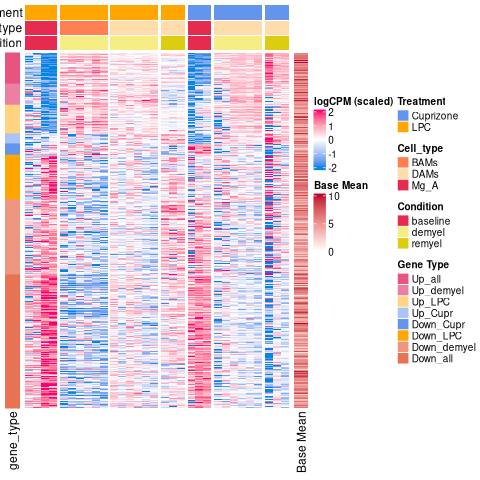

In [87]:
%%R

base_mean_colors <- colorRamp2(c(0, 10), c("white", "#be0032"))

ht_list = row_ha +
Heatmap(mat_scaled_ordered, name = "logCPM (scaled)",
    col = colorRamp2(c(-2, 0, 2), c("#0085e6", "white", "#fa0072")),
    top_annotation = ha,
    row_order = filtered_metadata$gene,
    column_order = ordered_cols$sample,  # 🔹 Manually ordered!
    column_split = factor(ordered_cols$col_split, 
                          levels = unique(ordered_cols$col_split)),  # 🔹 Keep correct order
    show_column_names = FALSE,
    show_row_names = TRUE,   
    show_column_dend = FALSE,  
    show_row_dend = FALSE,     
    row_names_gp = gpar(fontsize = 8),
    column_title = NULL  # 🔹 Remove split labels
) +
Heatmap(base_mean_ordered, name = "Base Mean",
    col = base_mean_colors,
    row_order = filtered_metadata$gene,
    width = unit(5, "mm"),
    show_row_names = FALSE,  
    row_names_gp = gpar(fontsize = 0)  
)

# Step 8: Draw the final heatmap
draw(ht_list, annotation_legend_list = list(lgd_gene_type))

In [88]:
%%R

# Get the number of genes per category
gene_counts <- table(filtered_metadata$category)

# Compute cumulative positions for row splits
split_positions <- cumsum(as.numeric(gene_counts))

# Assign a row number-based split
gene_row_split <- cut(seq_len(nrow(mat_scaled_ordered)), 
                      breaks = c(0, split_positions), 
                      labels = names(gene_counts))

In [89]:
%%R
# Capitalize first letter of condition labels
ordered_cols$Condition <- factor(
    tools::toTitleCase(as.character(ordered_cols$Condition)),  
    levels = c("Baseline", "Demyel", "Remyel")  # Maintain order
)

In [90]:
%%R

# Define colors for annotations
treatment_colors <- c("LPC" = "#ffa700", "Cuprizone" = "#6495ed")
cell_type_colors <- c("BAMs" = "#ff7f50", "DAMs" = "#ffdca9", "Mg_A" = "#e52b50")
condition_colors <- c("Baseline" = "#e52b50", "Demyel" = "#f6ed84", "Remyel" = "#ddcd10")
replicate_colors <- colorRamp2(c(1, 4), c("white", "gray"))

# Step 5: Define gene type colors
gene_type_colors <- c(
    "Up_all" = "#a51742", 
    "Up_demyel" = "#e75480", 
    "Up_LPC" = "#ed80a2", 
    "Up_Cupr" = "#f4b4c8",
    "Down_Cupr" = "#cecef4", 
    "Down_LPC" = "#8e8ee6", 
    "Down_demyel" = "#3e3ed4", 
    "Down_all" = "#191970"
)

In [91]:
%%R

# Ensure Treatment is a factor with LPC first
ordered_cols$Treatment <- factor(ordered_cols$Treatment, levels = c("LPC", "Cuprizone"))

# Update the heatmap annotation to respect the new order
ha = HeatmapAnnotation(
    Treatment = ordered_cols$Treatment,
    Cell_type = ordered_cols$Cell_type,
    Condition = ordered_cols$Condition,
    col = list(
        Treatment = treatment_colors,
        Cell_type = cell_type_colors,
        Condition = condition_colors
    ),
    show_legend = FALSE,
    annotation_name_side = "right"
)

# Create the Treatment legend manually with the correct order
lgd_treatment <- Legend(
    title = "Treatment",
    at = c("LPC", "Cuprizone"),  # Set order manually
    legend_gp = gpar(fill = treatment_colors[c("LPC", "Cuprizone")])  # Apply correct colors
)

# Ensure Cell_type follows the correct order
ordered_cols$Cell_type <- factor(ordered_cols$Cell_type, levels = c("Mg_A", "BAMs", "DAMs"))

# Create the Cell Type legend manually
lgd_cell_type <- Legend(
    title = "Cell Type",  # Change label
    at = c("Mg_A", "BAMs", "DAMs"),  # Set order
    legend_gp = gpar(fill = cell_type_colors[c("Mg_A", "BAMs", "DAMs")])  # Apply correct colors
)

# Capitalize first letter of condition labels
ordered_cols$Condition <- factor(ordered_cols$Condition, levels = c("Baseline", "Demyel", "Remyel"))

# Create the Cell Type legend manually
lgd_condition <- Legend(
    title = "Condition",  # Change label
    at = c("Baseline", "Demyel", "Remyel"),  # Set order
    legend_gp = gpar(fill = condition_colors[c("Baseline", "Demyel", "Remyel")])  # Apply correct colors
)

In [100]:
%%R

gene_annotation_ordered <- filtered_metadata$category[match(rownames(mat_scaled_ordered), filtered_metadata$gene)]

# Fix row annotation
row_ha = rowAnnotation(
    gene_type = anno_simple(as.character(gene_annotation_ordered), 
                            col = gene_type_colors, 
                            width = unit(8, "mm"))
)

# Create a heatmap legend for gene type
lgd_gene_type <- Legend(
    title = "Gene Type",
    at = names(gene_type_colors),  # Use category names
    legend_gp = gpar(fill = gene_type_colors)  # Apply colors
)

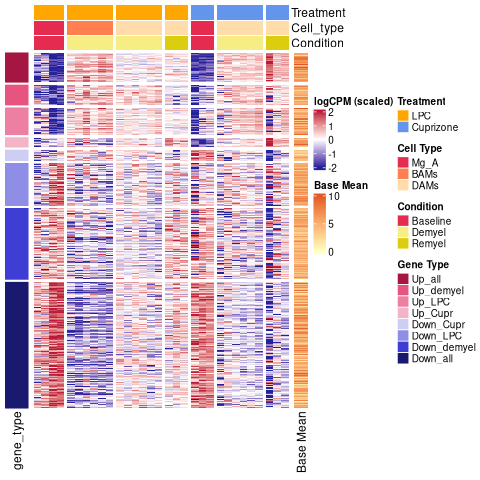

In [101]:
%%R

base_mean_colors <- colorRamp2(c(0, 10), c("#ffffc0", "#e25822"))

ht_list = row_ha +
Heatmap(mat_scaled_ordered, name = "logCPM (scaled)",
    col = colorRamp2(c(-2, 0, 2), c("#22229a", "white", "#bb1a3d")),
    top_annotation = ha,
    row_order = filtered_metadata$gene,  # 🔹 Maintain order
    column_order = ordered_cols$sample,  # 🔹 Maintain order
    column_split = factor(ordered_cols$col_split, 
                          levels = unique(ordered_cols$col_split)),  # 🔹 Keep correct column split
    row_split = gene_row_split,  # 🔹 Manually defined row split
    cluster_column_slices= FALSE,
    cluster_row_slices = FALSE,
    show_column_names = FALSE,
    show_row_names = TRUE,   
    show_column_dend = FALSE,  
    show_row_dend = FALSE,     
    row_names_gp = gpar(fontsize = 8),
    column_title = NULL,  # 🔹 Remove column split labels
    row_title = NULL      # 🔹 Remove row split labels
) +
Heatmap(base_mean_ordered, name = "Base Mean",
    col = base_mean_colors,
    row_order = filtered_metadata$gene,
    row_split = gene_row_split,  # 🔹 Ensure matching row split
    cluster_row_slices = FALSE,
    width = unit(5, "mm"),
    show_row_names = FALSE,  
    row_names_gp = gpar(fontsize = 0),
    row_title = NULL  # 🔹 Remove row split labels
)

# Save as PNG
png("heatmap_output.png", width = 12, height = 10, units = "in", res = 300)  
draw(ht_list, annotation_legend_list = list(lgd_treatment, lgd_cell_type, lgd_condition, lgd_gene_type))  
dev.off()  # Close the PNG device

# Display again in RStudio
draw(ht_list, annotation_legend_list = list(lgd_treatment, lgd_cell_type, lgd_condition, lgd_gene_type))